<a href="https://colab.research.google.com/github/lgwauter/NewRepo/blob/newbranch/Copy_of_CV__Group_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **COMPUTER VISION: GROUP ASSIGNMENT 1**
---
---

## 1. Dataset generation

### 1.1 Loading the images

Edit and run this cell to import all necessary packages and select four specific individuals. The images for this assignment have already been loaded and saved into a .pkl file, as some links took long to retrieve an image, and also to avoid future deleted links. They have been stored in a public Google Drive and can be downloaded from there by setting `look_for_images = False` and `download_from_drive = True`.

The chosen individuals are:

* ___Emma Stone___ as person A
* ___Kit Harington___ as person B
* ___Cara Delevigne___ as person C, similar to Emma Stone in gender, hair style and light hair color, nose. A typical feature of Cara (distinguishing her from Emma) is her pronounced eyebrows. 
* ___Jason Momoa___ as person D, similar to Kit also in gender and hair style (black, long and curly). Both played in GoT, too. Jason's beard probably distinguishes him best from Kit. 





In [2]:
import os
import cv2
import tarfile
import numpy as np
import pickle
from urllib import request
from urllib.error import HTTPError, URLError
from google.colab import drive
from google.colab.patches import cv2_imshow
import pickle
import requests
np.random.seed(10101)

look_for_images = False
download_from_drive = True

base_path = "/content/sample_data/CV__Group_assignment"
vgg_face_dataset_url = "http://www.robots.ox.ac.uk/~vgg/data/vgg_face/vgg_face_dataset.tar.gz"

if not os.path.isdir(base_path):
  os.makedirs(base_path)

with request.urlopen(vgg_face_dataset_url) as r, open(os.path.join(base_path, "vgg_face_dataset.tar.gz"), 'wb') as f:
  f.write(r.read())

with tarfile.open(os.path.join(base_path, "vgg_face_dataset.tar.gz")) as f:
  f.extractall(os.path.join(base_path))

trained_haarcascade_url = "https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_default.xml"

with request.urlopen(trained_haarcascade_url) as r, open(os.path.join(base_path, "haarcascade_frontalface_default.xml"), 'wb') as f:
    f.write(r.read())

def download_file_from_google_drive(id, destination):
    URL = "https://docs.google.com/uc?export=download"

    session = requests.Session()

    response = session.get(URL, params = { 'id' : id }, stream = True)
    token = get_confirm_token(response)

    if token:
        params = { 'id' : id, 'confirm' : token }
        response = session.get(URL, params = params, stream = True)

    save_response_content(response, destination)    

def get_confirm_token(response):
    for key, value in response.cookies.items():
        if key.startswith('download_warning'):
            return value

    return None

def save_response_content(response, destination):
    CHUNK_SIZE = 32768

    with open(destination, "wb") as f:
        for chunk in response.iter_content(CHUNK_SIZE):
            if chunk: # filter out keep-alive new chunks
                f.write(chunk)

if look_for_images:




  all_subjects = [subject for subject in sorted(os.listdir(os.path.join(base_path, "vgg_face_dataset", "files"))) if subject.endswith(".txt")]

  nb_subjects = 500
  nb_images_per_subject = 50

  images = []

  selection = ['Emma_Stone.txt', 
              'Kit_Harington.txt', 
              'Cara_Delevingne.txt', 
              'Jason_Momoa.txt']
  no_images = [
              30,
              30, 
              10,
              10
  ]

  unwanted = [
              [11,12,18,21,32,35,40,46,48,49],            # For Emma
              [5,6,12,14,20,23,24,41,42,44,47,48],        # For Kit
              [2,4,5,14,39],                              # For Cara
              [0,2,12,19,20,25,27,29,35,36,39,41,42]      # For Jason
  ]

  for subj_no, subject in enumerate(selection):

    with open(os.path.join(base_path, "vgg_face_dataset", "files", subject), 'r') as f:
      lines = f.readlines()
    img_number = 0
    images_ = []
    for line_no, line in enumerate(lines):
      
      url = line[line.find("http://"): line.find(".jpg") + 4]
      try:
        if line_no ==6:
          continue
        else:
          res = request.urlopen(url)
          img = np.asarray(bytearray(res.read()), dtype="uint8")
          img = cv2.imdecode(img, cv2.IMREAD_COLOR)
          h, w = img.shape[:2]
          if img_number not in unwanted[subj_no]: 
            images_.append(img)
          print("Image number:\t" + str(img_number))
          img_number+=1
          cv2_imshow(cv2.resize(img, (w // 5, h // 5)))
        
      except: #(HTTPError, URLError, AttributeError, ValueError):
        #print('Error')
        pass

      if len(images_) == nb_images_per_subject:
        images.append(images_)
        break

  
  with open('emma.pkl', 'wb') as file1:
    pickle.dump(images[0], file1)
  with open('kit.pkl', 'wb') as file2:
    pickle.dump(images[1], file2)
  with open('cara.pkl', 'wb') as file3:
    pickle.dump(images[2], file3)
  with open('jason.pkl', 'wb') as file4:
    pickle.dump(images[3], file4)
  
if download_from_drive:
  #taken from this StackOverflow answer: https://stackoverflow.com/a/39225039
  
  link = 'https://drive.google.com/drive/folders/1n8GJJW8m5Dne5yzE7xuhdlgystvgrKvP'

  ids = [
        '13JLBrXr6Ogb3ZyQ5esxlTm-6gePMAl4e', # Emma
        '1S3CqF2njU8GgQlMD3FdWCxSvEfMH_uHY', # Kit
        '1nqcpZbRXpMQPF_2RBrgFvTe4kciDIEaG', # Cara
        '1UzRweaFQ4O8FPx2zqkubKciUxZoAXhuN', # Jason
  ]

  names = ['Emma', 'Kit', 'Cara', 'Jason']

  for id_, name in zip(ids, names):
    print("Downloading images of "+name)
    download_file_from_google_drive(id_, 'sample_data/'+name+'.pkl')
  
  emma = pickle.load(open('sample_data/Emma.pkl', 'rb'))
  kit = pickle.load(open('sample_data/Kit.pkl', 'rb'))
  cara = pickle.load(open('sample_data/Cara.pkl', 'rb'))
  jason = pickle.load(open('sample_data/Jason.pkl','rb'))

  images = [emma, kit, cara, jason]

  print("\nDone.")




Done.


### 1.2. Generating training and test set, plotting images

Run this blok to generate the training sets (20 images of Emma, 20 of Kit) and test sets (10 images of Emma, 10 of Kit, 10 of Cara, 10 of Jason). Any image from which no face is detected, or multiple faces, is deleted a priori. The faces are required to be at least 100 pixels wide or high. The surviving pictures are then rescaled to 100x100 such that all images are of equal size. Then, train and test sets are randomly drawn as a subset from the survivors. Plot the results. 
For subsequent analysis,the data is stored in the variables:

* `emma_train`: 20 images
* `emma_val`  : 10 images
* `kit_train` : 20 images
* `kit_val`   : 10 images
* `cara`      : 10 images
* `jason`     : 10 images



Survivors:	47
Survivors:	36
Survivors:	38
Survivors:	37
Mininum face size: 100 x 100
________________________________________________________________________________


Images of Emma 

________________________________________________________________________________



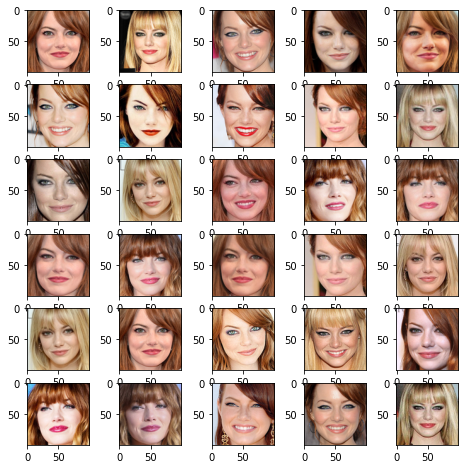

________________________________________________________________________________


Images of Kit 

________________________________________________________________________________



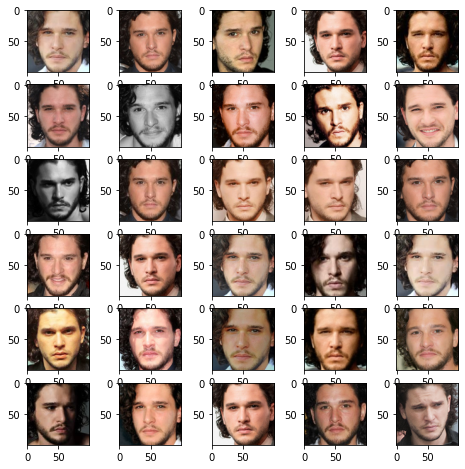

________________________________________________________________________________


Images of Cara 

________________________________________________________________________________



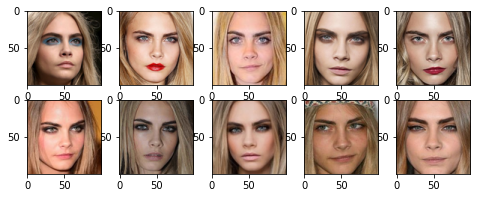

________________________________________________________________________________


Images of Jason 

________________________________________________________________________________



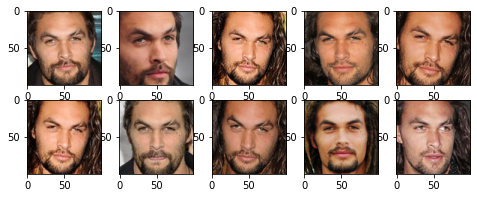

In [3]:
!pip install python-resize-image
from resizeimage import resizeimage
from PIL import Image
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt


faceCascade = cv2.CascadeClassifier(os.path.join(base_path, "haarcascade_frontalface_default.xml"))
names = ['\033[1mEmma', '\033[1mKit', '\033[1mCara', '\033[1mJason']
filtered_images = []
filtered_faces = []
smallest_face_size = (np.inf, np.inf)

for i, images_ in enumerate(images):
  filtered_imgs = []
  filtered_fcs = []
  survivors = 0
  
  for j, img in enumerate(images_):
    '''
    img = Image.fromarray(img)
    try:
      img = resizeimage.resize_cover(img, [200, 400])
    except:
      continue
    img = np.asarray(img)
    '''
    img_ = img.copy()

    img_gray = cv2.cvtColor(img_, cv2.COLOR_BGR2GRAY)
    faces = faceCascade.detectMultiScale(
        img_gray,
        scaleFactor=1.2,
        minNeighbors=5,
        minSize=(30, 30),
        flags=cv2.CASCADE_SCALE_IMAGE
    )
    

    for (x, y, w, h) in faces:
        cv2.rectangle(img_, (x-10, y-10), (x+w+10, y+h+10), (0, 255, 0), 10)
        face_crop = img[y-10:y+h+10, x-10:x+w+10]


    h, w = img_.shape[:2]
    h2, w2 = img.shape[:2]

    if len(faces) == 1 and min(face_crop.shape[:2]) >=100:
      if min(face_crop.shape[:2])< min(smallest_face_size):
        smallest_face_size = face_crop.shape[:2]
      survivors += 1
      filtered_imgs.append(img)
      filtered_fcs.append(face_crop)

    
  filtered_images.append(filtered_imgs)
  filtered_faces.append(filtered_fcs)
  print("Survivors:\t" +str(survivors))

print("Mininum face size: {} x {}".format(smallest_face_size[1], smallest_face_size[0]))

for i, faces_ in enumerate(filtered_faces):
  for j, face in enumerate(faces_):
    img = Image.fromarray(face)
    try:
      img = resizeimage.resize_cover(img, [smallest_face_size[1], smallest_face_size[0]])
    except:
      continue
    filtered_faces[i][j] = np.asarray(img)

emma_ind = np.random.choice(range(len(filtered_faces[0])), 30, replace=False)
emma = [filtered_faces[0][i] for i in emma_ind]
emma_train_ind = list(np.random.choice(range(30), 20, replace=False))
emma_val_ind = list(set(range(30)) - set(emma_train_ind))
emma_train = [emma[i] for i in emma_train_ind]
emma_val = [emma[i] for i in emma_val_ind]

kit_ind = np.random.choice(range(len(filtered_faces[1])), 30, replace=False)
kit = [filtered_faces[1][i] for i in kit_ind]
kit_train_ind = list(np.random.choice(range(30), 20, replace=False))
kit_val_ind = list(set(range(30)) - set(kit_train_ind))
kit_train = [kit[i] for i in kit_train_ind]
kit_val = [kit[i] for i in kit_val_ind]

cara_ind = np.random.choice(range(len(filtered_faces[2])), 10, replace=False)
cara = [filtered_faces[2][i] for i in cara_ind]

jason_ind = np.random.choice(range(len(filtered_faces[3])), 10, replace=False)
jason = [filtered_faces[3][i] for i in jason_ind]

for i, person in enumerate([emma, kit, cara, jason]):
  print("_"*80 + "\n\n" + "\nImages of " + names[i] + " \n\n" + "_"*80+'\n')
  figsize=(8, 8) if i in [0,1] else (8,3)
  fig=plt.figure(figsize=figsize)
  columns = 5 
  rows = 6 if i in [0,1] else 2
  for j, face in enumerate(person):
      fig.add_subplot(rows, columns, j+1)
      plt.imshow(cv2.cvtColor(face, cv2.COLOR_BGR2RGB))
  plt.show()


## 2. Handcrafted features

Code explanation here


In [0]:
# Collecting SIFT Features from image_DATA. 
# Install pip install opencv-contrib-python to use sift in python.
import cv2
import numpy as np
def getSiftFeatures(img):
  img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
  sift = cv2.xfeatures2d.SIFT_create()
  keypoints_sift, descriptors = sift.detectAndCompute(img, None)
  img = cv2.drawKeypoints(img, keypoints, None)
  cv2.imshow("Image", img)
  return keypoints_sift, descriptors



________________________________________________________________________________


Images of Emma 

________________________________________________________________________________



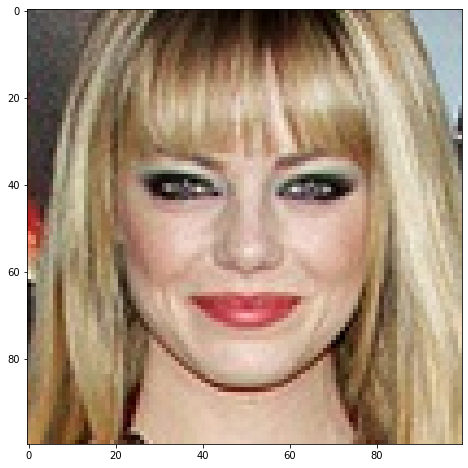

In [0]:
# Testing SIFT features for specific images. 

for i, person in enumerate([emma]):
  print("_"*80 + "\n\n" + "\nImages of " + names[i] + " \n\n" + "_"*80+'\n')
  figsize=(8, 8) if i in [0,1] else (8,3)
  fig=plt.figure(figsize=figsize)
  columns = 5 
  rows = 6 if i in [0,1] else 2
  for j, face in enumerate(person):
    pass
  #    fig.add_subplot(rows, columns, j+1)
  #    plt.imshow(cv2.cvtColor(face, cv2.COLOR_BGR2RGB))
  #plt.show()

plt.imshow(cv2.cvtColor(face, cv2.COLOR_BGR2RGB))
plt.show()


## 3. Learning features from data

### 3.1. PCA 

Run this code block to calculate the mean image from the training dataset (20 images of Emma, 20 images of Kit).

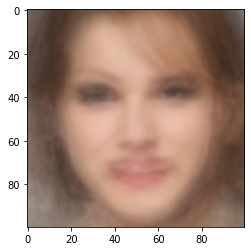

In [4]:
## Code for PCA here
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd

mean_img = np.zeros_like(emma_train[0]).astype('int')
for el in emma_train+kit_train:
  mean_img += el

mean_img = (mean_img/len(emma_train+kit_train)).astype('uint8')

plt.figure()
plt.imshow(cv2.cvtColor(mean_img, cv2.COLOR_BGR2RGB))
plt.show()

train_data = emma_train+kit_train


Run this code block to gradually build up an image with increasing PCA components. 

The previous code block calculated the mean image of Emma and Kit (train images). This mean image will be used the 'center' the data for PCA, which requires calculation of the eigenvalues and eigenvectors of the data covariance matrix C:

$
\textbf{C} = \frac{1}{n-1} \textbf{X} \cdot \textbf{X}^T
$

The implementation of scikit-learn (and most implementations nowadays) use *singular value decomposition* (SVD) of the data matrix $\textbf{X}$ to calculate the eigenvalues of the covariance matrix as follows:

$
\textbf{X} = \textbf{U} \cdot \textbf{$\Sigma$} \cdot \textbf{V}^T 
$,

where $\textbf{$\Sigma$}$ is an $n$ x $m$ rectangular diagonal matrix containing the singular values of $\textbf{X}$ on its diagonal, and $\textbf{U}$ and $\textbf{V}$ are unitary (or orthogonal, as they will only contain real entries) square matrices with the columns representing the left and right singular vectors of $\textbf{X}$, respectively.

The link with the covariance matrix can be shown as follows:

$\frac{1}{n-1} \textbf{X} \cdot \textbf{X}^T$ 

$= \frac{1}{n-1}(\textbf{U} \cdot \textbf{$\Sigma$} \cdot \textbf{V}^T) \cdot(\textbf{U} \cdot \textbf{$\Sigma$} \cdot \textbf{V}^T) ^T $

$= \frac{1}{n-1}(\textbf{U} \cdot \textbf{$\Sigma$} \cdot \textbf{V}^T) \cdot(\textbf{V} \cdot \textbf{$\Sigma$}^T \cdot \textbf{U}^T)$

$= \frac{1}{n-1} \textbf{U} \cdot \textbf{$\Sigma$}^2 \cdot \textbf{U}^T $

where $\textbf{$\Sigma$}^2 = \textbf{$\Sigma$} \cdot \textbf{$\Sigma$}^T $ and $ \textbf{V}^T \cdot \textbf{V} = \textbf{I}$ . It can thus be seen that the singular vectors of $\textbf{U}$ correspond to the eigenvectors of $\textbf{X} \cdot \textbf{X}^T$, and the singular values of $\textbf{X}$ in $\textbf{$\Sigma$}$ correspond to the square root of the eigenvalues of $\textbf{X} \cdot \textbf{X}^T$.  Efficient and fast algorithms exist, eliminating the need to calculate $\textbf{X} \cdot \textbf{X}^T$.

A reconstruction loss may be calculated as the mean squared error of the original image and the reconstruction: $e = \frac{1}{n}(\textbf{$X$}-\textbf{$\hat{X}$}) \cdot (\textbf{$X$}-\textbf{$\hat{X}$})^T $, with $X$ the flattened image array. 
The loss plot clearly shows a significant error drop until about n=15..20 components. After that, the error only drops slightly. Therefore, it would be best to choose n somewhere in this range. 










________________________________________________________________________________


Emma and Kit gradually appearing with increasing PCA components. 

________________________________________________________________________________



Text(0, 0.5, 'mse')

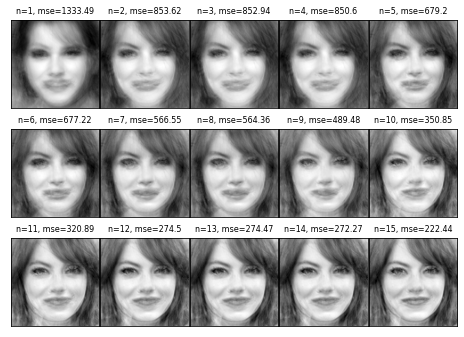

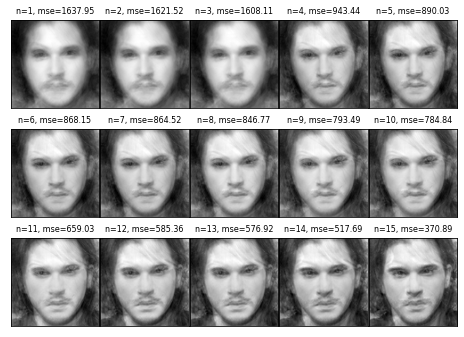

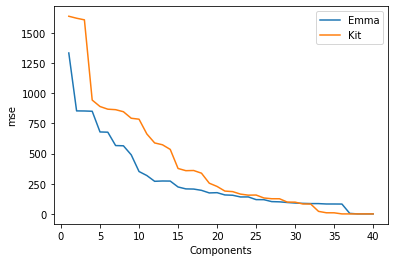

In [6]:
import pandas as pd
faces = pd.DataFrame([])
for i, img in enumerate(train_data):
  img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  face = pd.Series(img_gray.flatten()/255, name=i)
  faces = faces.append(face)


faces_pca = PCA(n_components=10)
faces_pca.fit(faces)

# Uncomment to view components
"""
fig, axes = plt.subplots(4,5,figsize=(9,8),
 subplot_kw={'xticks':[], 'yticks':[]},
 gridspec_kw=dict(hspace=0.01, wspace=0.01))
for i, ax in enumerate(axes.flat):
 try:
  ax.imshow(faces_pca.components_[i].reshape(100,100),cmap="gray")
 except:
   pass
"""

print("_"*80 + "\n\n" + "\nEmma and Kit gradually appearing with increasing PCA components." + " \n\n" + "_"*80+'\n')

fig, axes = plt.subplots(3,5,figsize=(8,6), 
                        subplot_kw={'xticks':[], 'yticks':[]},
                        gridspec_kw=dict(hspace=0.01, wspace=0.01))

for i in range(15):

  faces_pca = PCA(n_components=i+1)
  faces_pca.fit(faces)

  components = faces_pca.transform(faces)
  projected = faces_pca.inverse_transform(components)

  rec_emma = (projected[0]*255).reshape(100,100)
  gray_emma = cv2.cvtColor(emma_train[0], cv2.COLOR_BGR2GRAY)
  err = np.mean((rec_emma-gray_emma)**2)
  axes.flat[i].imshow(projected[0].reshape(100,100),cmap="gray")
  axes.flat[i].set_title("n={}, mse={}".format(str(i+1), str(round(err,2))), fontsize=8)



fig, axes = plt.subplots(3,5,figsize=(8,6), 
                        subplot_kw={'xticks':[], 'yticks':[]},
                        gridspec_kw=dict(hspace=0.01, wspace=0.01))

for i in range(15):
  faces_pca = PCA(n_components=i+1)
  faces_pca.fit(faces)

  components = faces_pca.transform(faces)
  projected = faces_pca.inverse_transform(components)

  rec_kit = (projected[20]*255).reshape(100,100)
  gray_kit = cv2.cvtColor(kit_train[0], cv2.COLOR_BGR2GRAY)
  err = np.mean((rec_kit-gray_kit)**2)

  axes.flat[i].imshow(projected[20].reshape(100,100),cmap="gray")
  axes.flat[i].set_title("n={}, mse={}".format(str(i+1), str(round(err,2))), fontsize=8)

emma_errs =[]
kit_errs = []
x = np.arange(40)+1
for k in x:
  faces_pca = PCA(n_components=k)
  faces_pca.fit(faces)
  components = faces_pca.transform(faces)
  projected = faces_pca.inverse_transform(components)
  rec_emma = (projected[0]*255).reshape(100,100)
  rec_kit = (projected[20]*255).reshape(100,100)
  gray_emma = cv2.cvtColor(emma_train[0], cv2.COLOR_BGR2GRAY)
  gray_kit = cv2.cvtColor(kit_train[0], cv2.COLOR_BGR2GRAY)

  emma_err = np.mean((rec_emma-gray_emma)**2)
  kit_err = np.mean((rec_kit-gray_kit)**2)
  emma_errs.append(emma_err)
  kit_errs.append(kit_err)

plt.figure()
plt.plot(x, emma_errs)
plt.plot(x, kit_errs)
plt.legend(['Emma', 'Kit'])
plt.xlabel('Components')
plt.ylabel('mse')


Run this code block to visualize the pictures in a 2-D plane of the first and second eigenface components of the test images. Make sure to run the previous block as well.

From the plot, it is clear that the faces are localized: Emma and Cara appear on the (lower) left side of the figure, while Kit and Jason appear on the (upper) right side of the figure. This makes it easy for the classifier (e.g. a SVM) to separate male and female (the two trained classes, Kit and Emma), but distinguishing Kit from Jason and Emma from Cara will be a more difficult task.


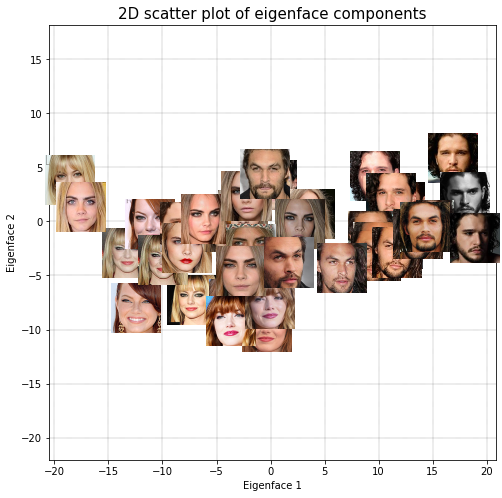

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from matplotlib.cbook import get_sample_data

faces_pca = PCA(n_components=2)
faces_pca.fit(faces)

test_data = emma_val + kit_val + cara + jason
test_faces = pd.DataFrame([])

for i, img in enumerate(test_data):
  img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  testface = pd.Series(img_gray.flatten()/255, name=i)
  test_faces = test_faces.append(testface)

test_components = faces_pca.transform(test_faces)

def main():
    x = test_components[:, 0]
    y = test_components[:, 1]
    ims = emma_val + kit_val + cara + jason
    fig, ax = plt.subplots(figsize=(8,8))
    imscatter(x, y, ims, zoom=0.5, ax=ax)
    plt.show()

def imscatter(x, y, image, ax=None, zoom=1):
    x, y = np.atleast_1d(x, y)
    artists = []
    for x0, y0, img in zip(x, y, image):
        im = OffsetImage(cv2.cvtColor(img,cv2.COLOR_BGR2RGB), zoom=zoom)
        ab = AnnotationBbox(im, (x0, y0), xycoords='data', frameon=False)
        artists.append(ax.add_artist(ab))
    ax.update_datalim(np.column_stack([x, y]))
    ax.axis('equal')
    ax.grid(color='k', linestyle='--', linewidth=0.2)
    ax.set_xlabel('Eigenface 1')
    ax.set_ylabel('Eigenface 2')
    ax.set_title('2D scatter plot of eigenface components', fontsize=15)
    return artists

main()

### 3.2. Transfer learning

Run this code block to make a t-SNE plot of face features from our dataset. The features are obtained by feeding the images through a deep convolutional neural network, from which the final layer (classifier) is removed. Normally, this final layer combines the features of the 2048-dimensional feature vector outputted by the final convolutional layer to make a prediction. 
The high-dimensional feature vectors can be compressed into a 2-D plot using t-SNE. The output figure nicely shows how the features of images of Emma, Kit, Cara and Jason are grouped together. Also note that the point cloud of Kit is closer to Jason's point cloud, and similarly, Emma's point cloud is closer to Cara's. This is to be expected, as Cara and Emma share a lot of features, as do Kit and Jason. Also note that it's a lot easier to classify images based on two t-SNE components than on two PCA components. 














165445632/165439116 [==============================] - 4s 0us/step
Inputs: [<tf.Tensor 'input_1:0' shape=(?, 224, 224, 3) dtype=float32>]
Outputs: [<tf.Tensor 'flatten_1/Reshape:0' shape=(?, ?) dtype=float32>]
(80, 2048)


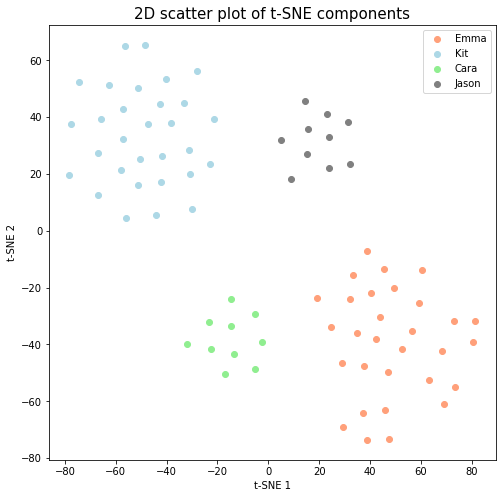

In [8]:
## Code for transfer learning here
!pip install keras-vggface
!pip install swat
from keras_vggface.vggface import VGGFace
from keras_vggface.utils import decode_predictions
import swat
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from time import time
from keras.models import Model
import seaborn as sns
%matplotlib inline
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import MinMaxScaler

imgs = np.array([cv2.resize(im, (224,224)) for im in emma+kit+cara+jason])

# create a vggface2 model, remove final layer to output final features
model = VGGFace(model='resnet50')
model2 = Model(model.input, model.layers[-2].output) 

# summarize input and output shape
print('Inputs: %s' % model2.inputs)
print('Outputs: %s' % model2.outputs)

model_outp = model2.predict(imgs)
print(model_outp.shape)

scaler = MinMaxScaler()
scaled_outp = scaler.fit_transform(model_outp)

tsne = TSNE(n_components=2, random_state=0)
tsne_results = tsne.fit_transform(scaled_outp)

tsne_results


x = tsne_results[:,0]
y = tsne_results[:,1]
plt.figure(figsize=(8,8))
def color(index):
  if i <30:
    return "lightsalmon", "Emma"
  elif i<60:
    return "lightblue", "Kit"
  elif i<70:
    return "lightgreen", "Cara"
  else: 
    return "grey", "Jason"

plt.scatter(x[:30],y[:30], c="lightsalmon", label="Emma")
plt.scatter(x[30:60], y[30:60], c="lightblue", label="Kit")
plt.scatter(x[60:70], y[60:70], c="lightgreen", label="Cara")
plt.scatter(x[70:], y[70:], c="grey", label="Jason")
plt.title("2D scatter plot of t-SNE components", fontsize=15)
plt.xlabel("t-SNE 1")
plt.ylabel("t-SNE 2")
plt.legend()
plt.show()





## 4. Exploit feature representations

### 4.1. Classification

Code explanation here

In [0]:
## Code for classification here







### 4.2. Identification

Code explanation here

In [0]:
## Code for identification here






### 4.3. Impress your TAs

Code explanation here



In [0]:
## Code for impress your TAs goes here




